# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful algorithm used in machine learning for classification tasks. Its primary objective is to find a classifier that maximizes the margin between different classes in the dataset. This formulation leads to a convex optimization problem, allowing for the discovery of a globally optimal solution.

- svm searches for a classifier with maximum margin
- formulation as a convex optimization problem leads to the possibility to find the globally optimum solution

In the context of SVM, let's denote a set of input samples as $x_i$ and their corresponding target labels as $y_i$, represented as $X^l = (x_i, y_i)^l_{i=1}$, where $y_i \in Y = {-1, +1}$ and $x_i \in \mathcal{R}^n$. When dealing with linearly separable data, SVM aims to find a hyperplane defined by the equation:

\begin{equation*}
    \begin{cases}
        \frac{1}{2} || \omega ||^2 \to \text{min} \\
        M_i (\omega, \omega_0),
    \end{cases}
\end{equation*}

here $M_i(\omega, \omega_0) + ((x_i, \omega) - \omega_0)$ - is a margin of $x_i$ from the hyperplane. The optimization task is to minimize:

$Q(\omega, \omega_0) = \sum_{i=1}^l (1 - M_i(\omega, \omega_0)) + \frac{1}{2C} ||\omega||^2 \to \text{min}$

When dealing with non-linearly separable data, slack variables $\xi_i$ are introduced to account for misclassification. This leads to the following optimization problem:

\begin{equation*}
    \begin{cases}
        \frac{1}{2} || \omega ||^2 + C \sum_{i=1}^l \xi_i \to \text{min}_{\omega, \omega_0, \xi} \\
        \xi_i \geq 1-  M_i (\omega, \omega_0) \\
        \xi_i > 0
    \end{cases}
\end{equation*}

$Q(\omega, \omega_0) = C\sum_{i=1}^l (1 - M_i(\omega, \omega_0)) + \frac{1}{2C} ||\omega||^2 \to \text{min}$

Here $C$ is the regularizational hyperparameter. Bigger $C$ - less missclassified points are and narrower the margin is

The solution involves using the Karush-Kuhn-Tucker conditions and minimizing the Lagrangian with respect to Lagrange multipliers $\lambda_i$. The key is to identify support vectors, training points with $\lambda_i > 0$. SVM has three cases for these points:

$\mathcal{L} = \frac{1}{2}||\omega||^2 - \sum_{j=1}^l \lambda_i (M_i(\omega, \omega_0) - 1) - \sum_{i=1}^l \xi_i(\lambda_i + \eta_i - C)$

\begin{equation*}
    \begin{cases}
        \frac{\partial \mathcal{L}}{\partial \omega} = 0, \frac{\partial \mathcal{L}}{\partial \omega_0} = 0, \frac{\partial \mathcal{L}}{\partial \xi} = 0, \\
        \xi_i \geq 0, \lambda_i \geq 0, \eta_i \geq 0, i = 1,...,l \\
        \lambda_i = 0 ~\text{or}~ M_i(\omega, \omega_0) = 1 - \xi_i, i = 1,...,l\\
        \eta_i = 0, ~\text{or}~ \xi-i=0, i = 1,...,l
    \end{cases}
\end{equation*}

The training points having $\lambda_i > 0 $ are called "support vectors" thus we need to compute only the derivatives $\lambda_i \neq 0$. We have the following three cases:


- $\lambda_i = 0, \eta_i + C, \xi_i = 0, M_i \geq 1$ - peripheral
- $0 < \lambda_i < C, 0 < \eta_i < C, \xi_i = 0, M_i = 1$ - SV case
- $\lambda_i = C, \eta_i = 0, \xi-_i > 0, M_i < 1 $ - breaking case

Despite its strengths, SVM has some drawbacks including lack of automatic feature selection, the need to tune the hyperparameter $C$, and slower performance on large datasets.

In [30]:

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [31]:

X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

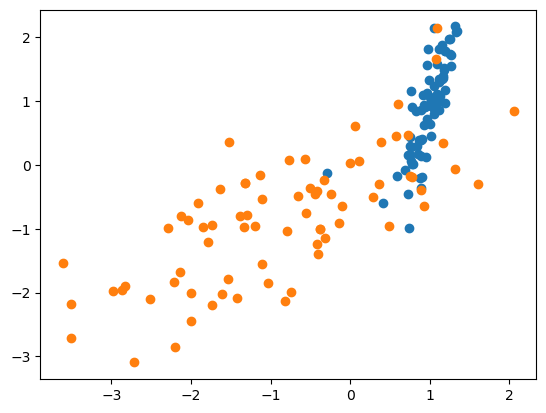

In [32]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [33]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

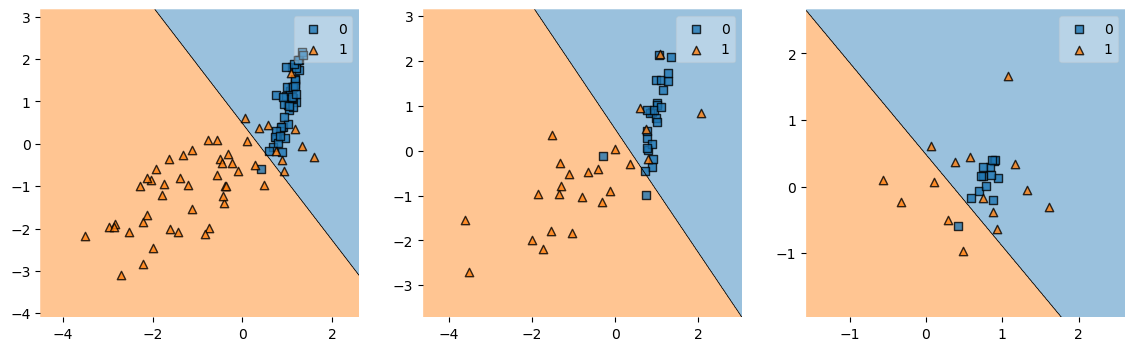

In [34]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

### Kernels for SVM

In [35]:
np.random.seed(42)
m = 150
n = 2
X = 10*np.random.randn(m, n)

Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

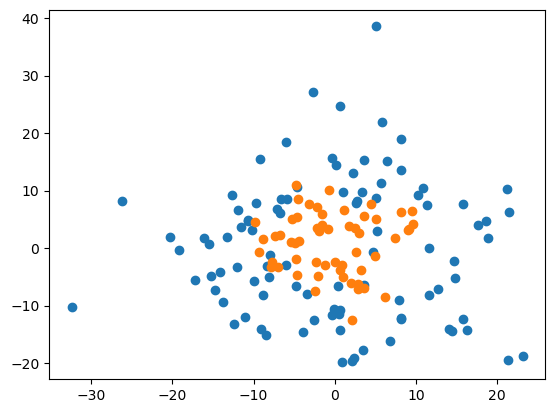

In [36]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [39]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

/Users/aleksandrglushko/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
/Users/aleksandrglushko/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
/Users/aleksandrglushko/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


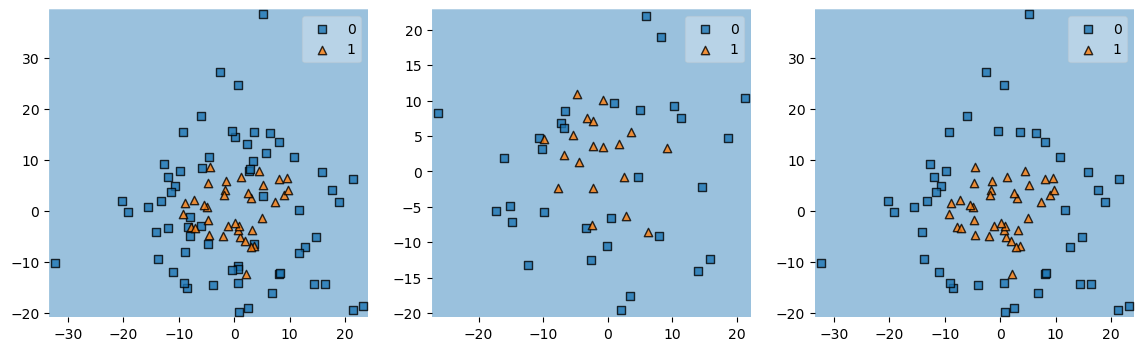

In [40]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [41]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

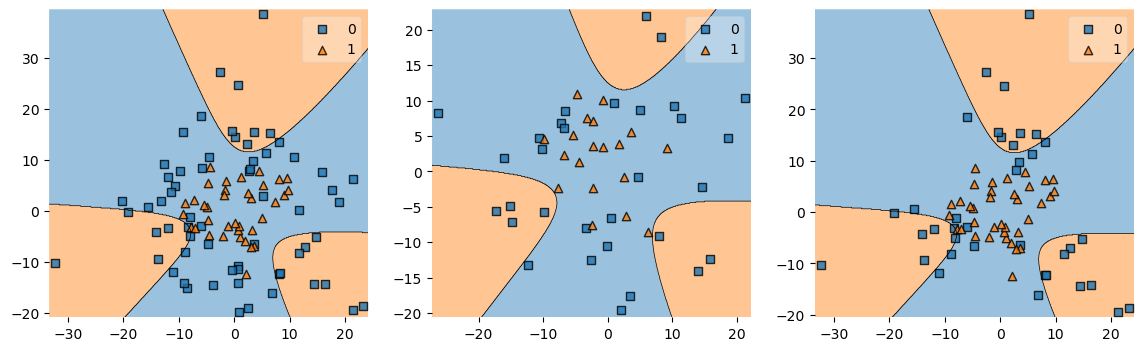

In [45]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [51]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)

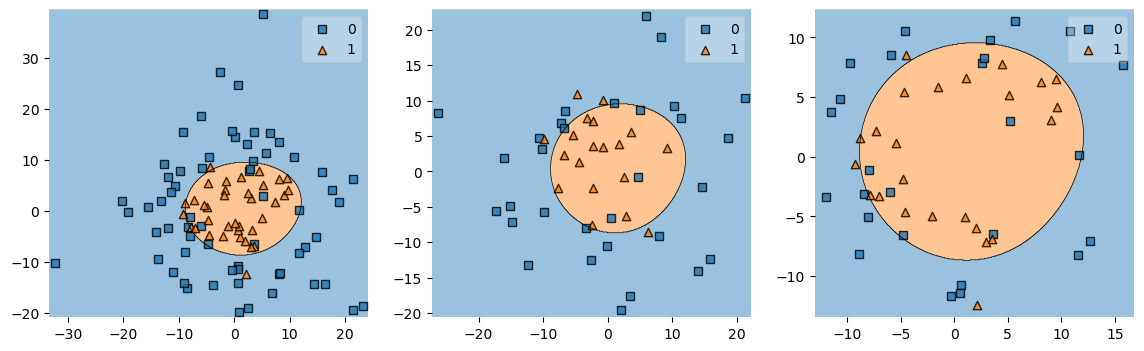

In [52]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

### SVM Regression

SVM Regression, often referred to as Support Vector Regression (SVR), is a machine learning algorithm that seeks to find a regression line that fits the data while minimizing the margin violations. Instead of finding a hyperplane that separates classes, you're trying to find a hyperplane that best fits the data points. This hyperplane is the regression line. The margin around this line is a tolerance zone within which errors are allowed.

For the regression we need to optimize the following task:
$\sum_{i=1}^l (|(\omega, x-i) - \omega_0 - y_i| - \delta) + \frac{1}{2}||w||^2 \to min$

Here $\delta$ dictates how much error you are willing to tolerate within the margin.

In [53]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x, np.sin(x)]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

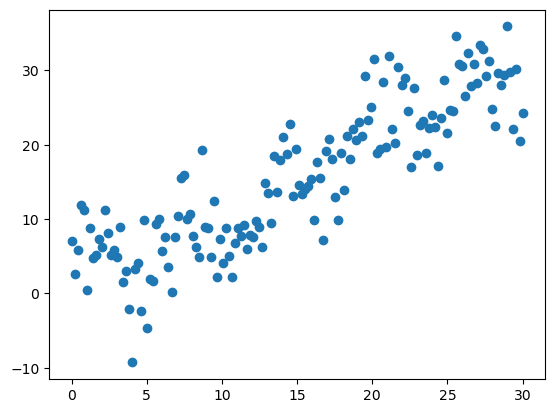

In [54]:
plt.plot(X[:, 0], Y, 'o')
    
plt.show()

In [55]:
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

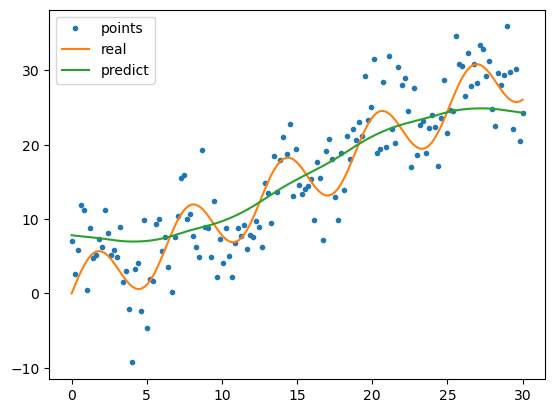

In [56]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [57]:
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

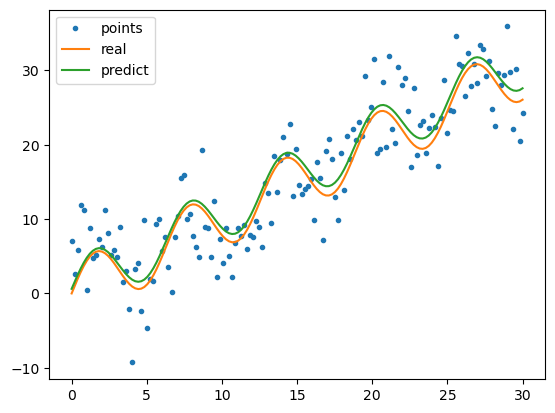

In [58]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()